#  Exploratory Data Analysis for Health Dataset 🩺🏥

### Importing Data Analysis and Visualization Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
warnings.resetwarnings()

In [2]:
# Read the CSV file
df = pd.read_csv('Ha_dataset.csv')

### Data Understanding:

In [3]:
# Display the first few rows
df.head()

,ID,Age,Gender,Medical Condition,Test Result,Medication,Insurance Provider,Amount Billing,Admission Type,Admission Date,Discharge Date,Length of Stay
0,1,62,Female,Hypertension,Abnormal,Paracetamol,Healthier,3333.0,Urgent,06/21/2022,07/05/2022,14
1,2,65,Male,Diabetes,Normal,Paracetamol,BlueHealth,4895.0,Elective,12/22/2021,01/07/2022,14
2,3,82,Female,Asthma,Abnormal,Paracetamol,BlueHealth,4730.0,Elective,08/14/2023,08/27/2023,21
3,4,85,Female,Obesity,Abnormal,Lipitor,Healthier,6514.5,Urgent,06/18/2023,07/15/2023,21
4,5,85,Male,Asthma,Abnormal,Paracetamol,LiveWell,4672.5,Emergency,08/22/2021,09/14/2021,21


In [18]:
# Get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 770 non-null    int64         
 1   Gender              770 non-null    object        
 2   Medical Condition   770 non-null    object        
 3   Test Result         770 non-null    object        
 4   Medication          770 non-null    object        
 5   Insurance Provider  770 non-null    object        
 6   Amount Billing      770 non-null    float64       
 7   Admission Type      770 non-null    object        
 8   Admission Date      770 non-null    datetime64[ns]
 9   Discharge Date      770 non-null    datetime64[ns]
 10  Length of Stay      770 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 66.3+ KB


In [5]:
# Count the number of unique values in each column
df.nunique()

ID                    770
Age                    68
Gender                  2
Medical Condition       5
Test Result             3
Medication              5
Insurance Provider      5
Amount Billing        376
Admission Type          3
Admission Date        563
Discharge Date        550
Length of Stay          4
dtype: int64

In [6]:
# Summary statistics of numerical columns
df.describe()

,ID,Age,Amount Billing,Length of Stay
count,770.000000,770.000000,770.000000,770.000000
mean,385.500000,50.249351,3797.360390,10.800000
std,222.424144,19.810156,1437.000112,7.817422
min,1.000000,18.000000,1111.000000,0.000000
25%,193.250000,33.000000,2730.000000,7.000000
50%,385.500000,50.000000,3769.750000,7.000000
75%,577.750000,67.000000,4725.000000,21.000000
max,770.000000,85.000000,7740.000000,21.000000


In [7]:
# Summary statistics of Categorical columns
df.describe(include='O')

,Gender,Medical Condition,Test Result,Medication,Insurance Provider,Admission Type,Admission Date,Discharge Date
count,770,770,770,770,770,770,770,770
unique,2,5,3,5,5,3,563,550
top,Male,Hypertension,Inconclusive,Paracetamol,GHealth,Emergency,01/24/2022,11/21/2021
freq,397,164,273,172,169,271,4,4


### Data Cleaning:

In [8]:
# Count the number of missing values in each column
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Medical Condition     0
Test Result           0
Medication            0
Insurance Provider    0
Amount Billing        0
Admission Type        0
Admission Date        0
Discharge Date        0
Length of Stay        0
dtype: int64

In [9]:
# Checking for Duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
765    False
766    False
767    False
768    False
769    False
Length: 770, dtype: bool

In [17]:
# Convert Admission Date and Discharge Date columns to datetime type
df['Admission Date'] = pd.to_datetime(df['Admission Date'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

# Univariate Analysis:

### The purpose of the univariate analysis is to understand the distribution of values for a single variable.

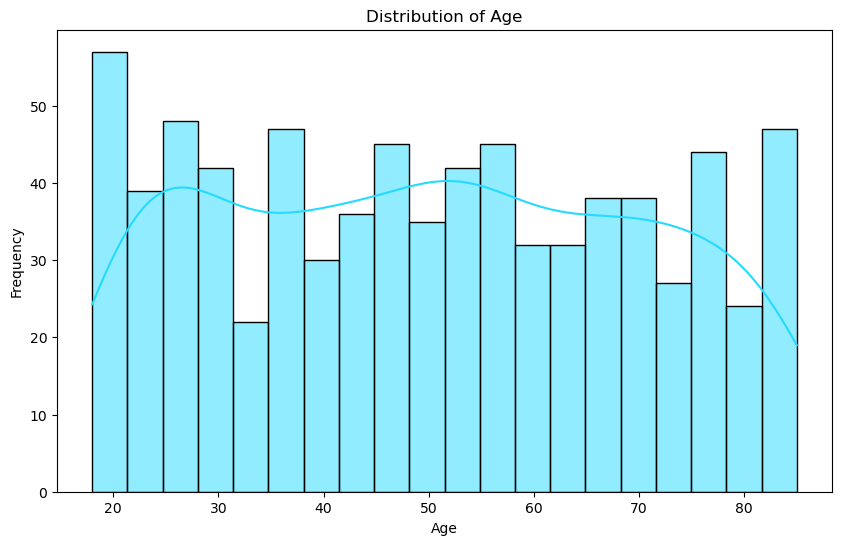

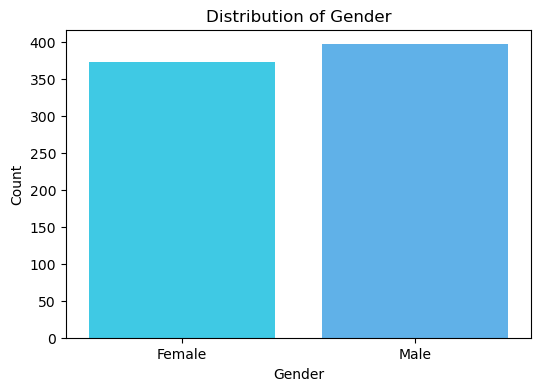

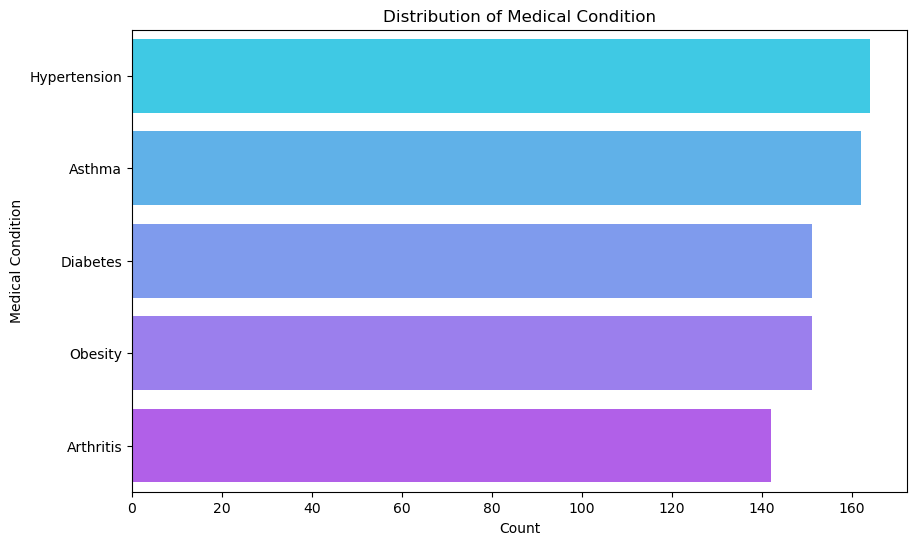

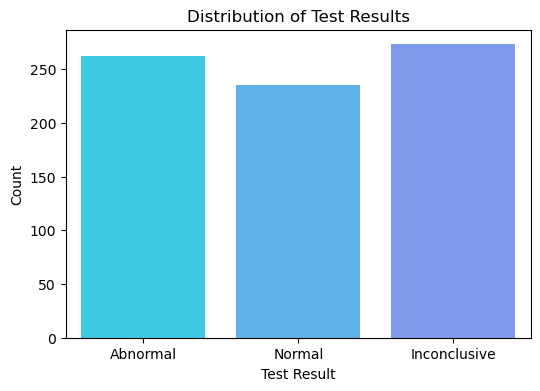

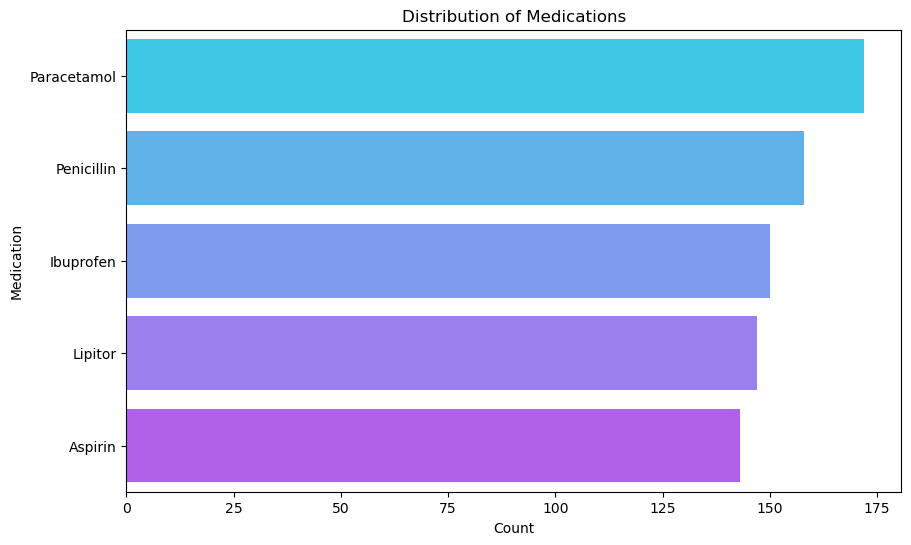

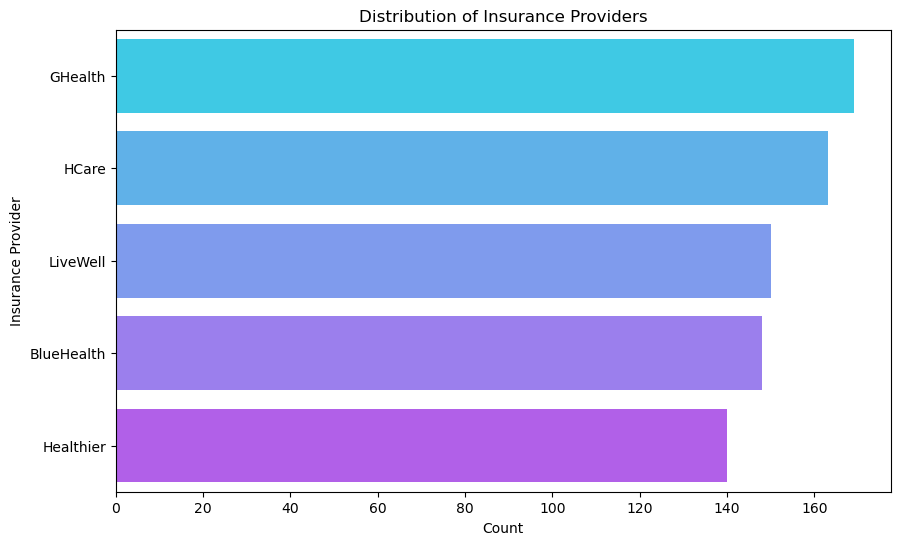

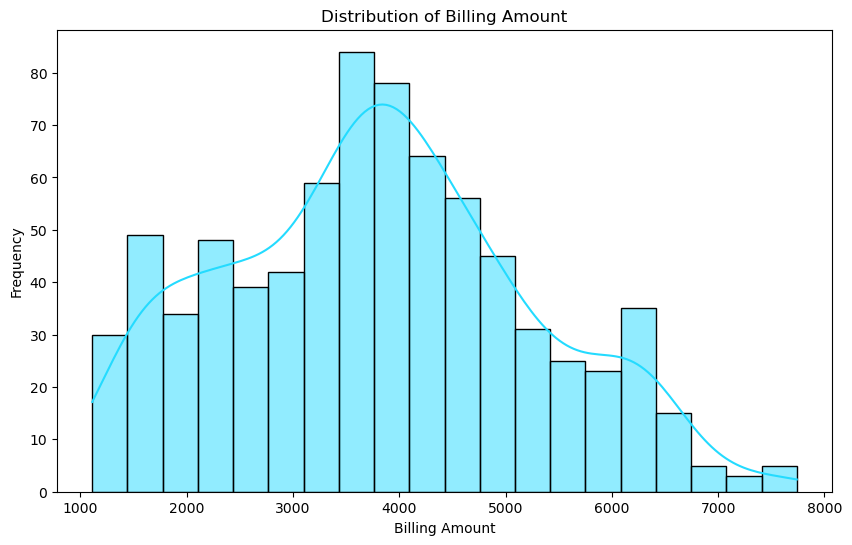

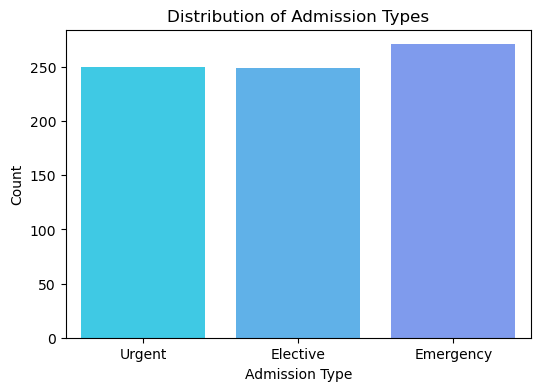

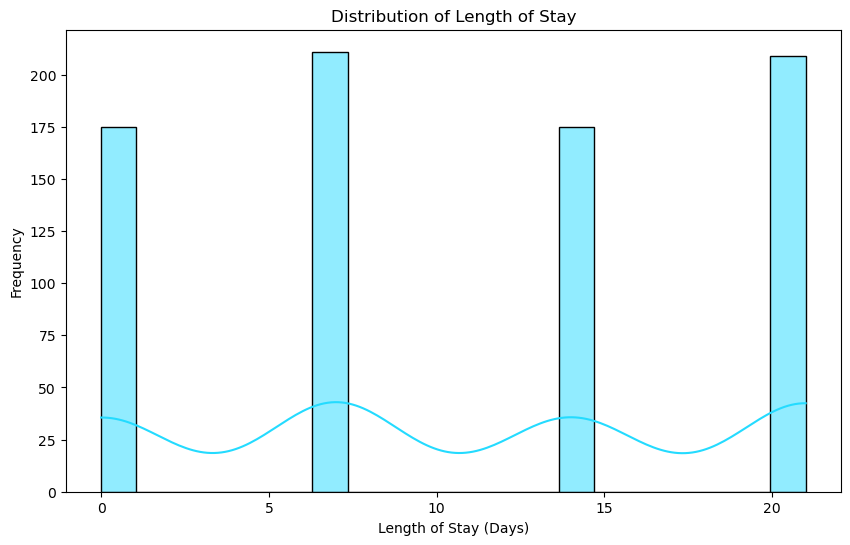

In [11]:
# Set the color palette
sns.set_palette("cool")

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Medical Condition distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title('Distribution of Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

# Test Result distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Test Result')
plt.title('Distribution of Test Results')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.show()

# Medication distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Medication', order=df['Medication'].value_counts().index)
plt.title('Distribution of Medications')
plt.xlabel('Count')
plt.ylabel('Medication')
plt.show()

# Insurance Provider distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Insurance Provider', order=df['Insurance Provider'].value_counts().index)
plt.title('Distribution of Insurance Providers')
plt.xlabel('Count')
plt.ylabel('Insurance Provider')
plt.show()

# Billing Amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount Billing', bins=20, kde=True)
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

# Admission Type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Admission Type')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

# Length of Stay distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Length of Stay', bins=20, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis:

### The primary purpose is to explore how changes in one variable are associated with changes in another variable.

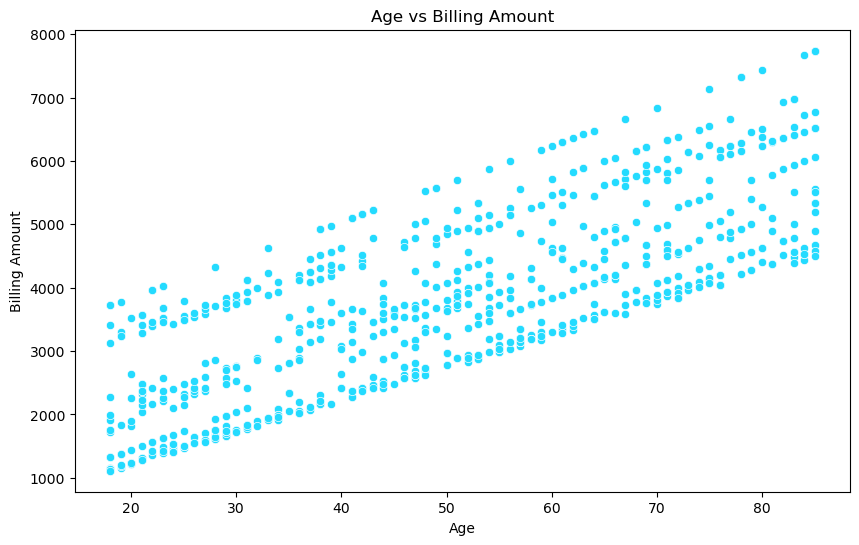

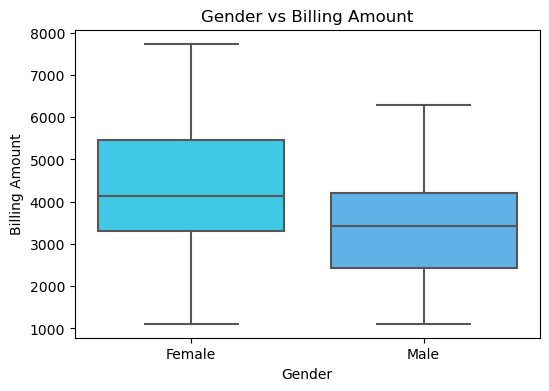

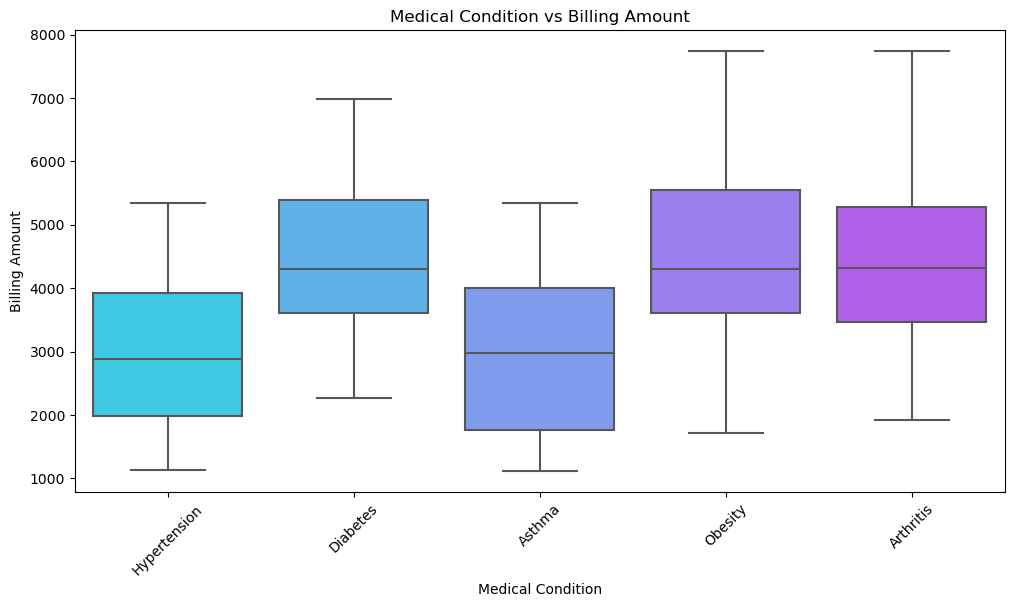

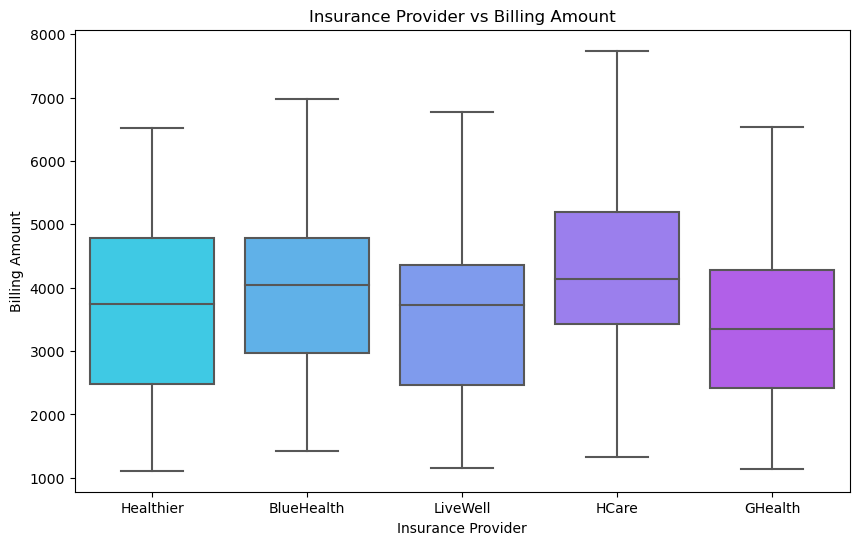

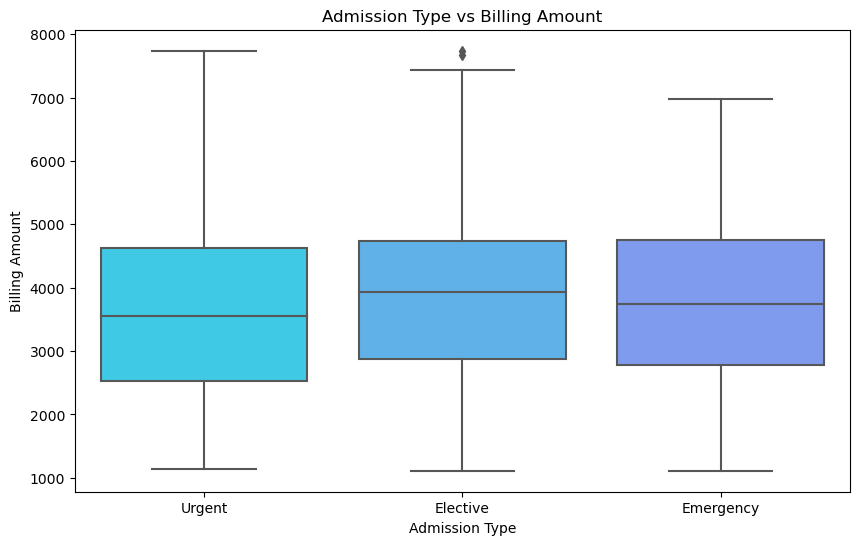

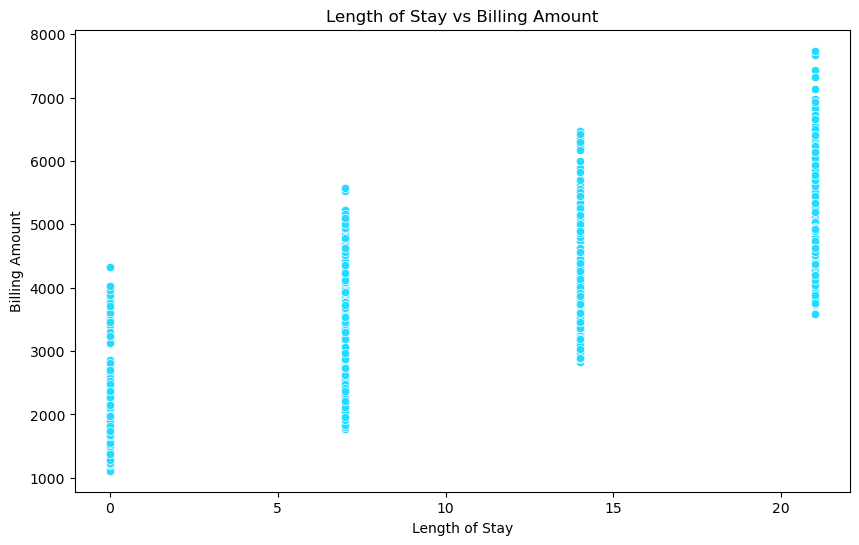

In [12]:
# Age vs Billing Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Amount Billing')
plt.title('Age vs Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

# Gender vs Billing Amount
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='Amount Billing')
plt.title('Gender vs Billing Amount')
plt.xlabel('Gender')
plt.ylabel('Billing Amount')
plt.show()

# Medical Condition vs Billing Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Medical Condition', y='Amount Billing')
plt.title('Medical Condition vs Billing Amount')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.show()

# Insurance Provider vs Billing Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Insurance Provider', y='Amount Billing')
plt.title('Insurance Provider vs Billing Amount')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.show()

# Admission Type vs Billing Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Admission Type', y='Amount Billing')
plt.title('Admission Type vs Billing Amount')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()

# Length of Stay vs Billing Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Length of Stay', y='Amount Billing')
plt.title('Length of Stay vs Billing Amount')
plt.xlabel('Length of Stay')
plt.ylabel('Billing Amount')
plt.show()

# Multivariate Analysis:

### The purpose is to understand the complex interactions and patterns among multiple variables in the dataset.

C:\Users\NOOF\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


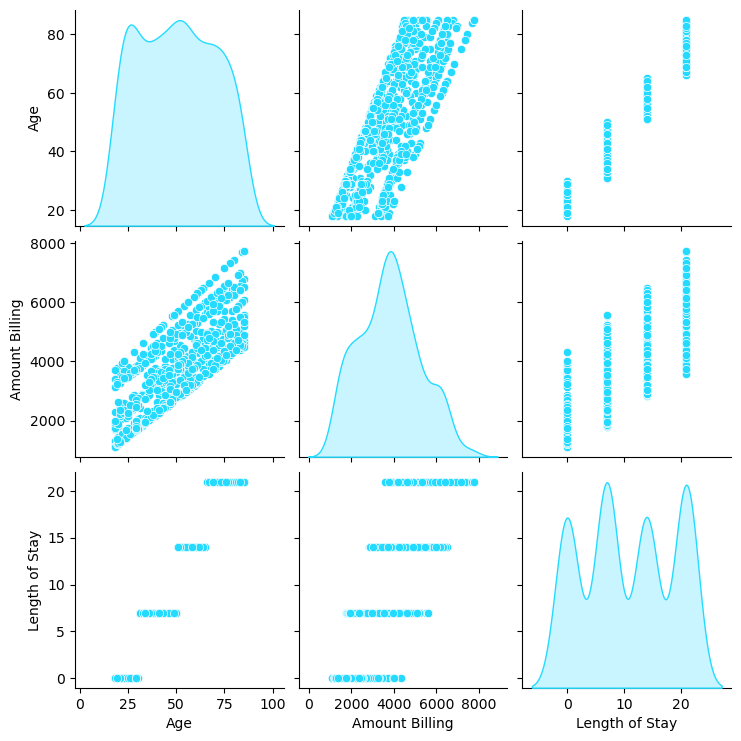

In [19]:
# Select numerical columns excluding ID
numerical_columns = health_data.select_dtypes(include=['int64', 'float64']).drop(columns=['ID']).columns

# Set the color
sns.set_palette("cool")

# Pair plot for numerical variables excluding ID 
sns.pairplot(df[['Age', 'Amount Billing', 'Length of Stay']], diag_kind='kde')
plt.show()

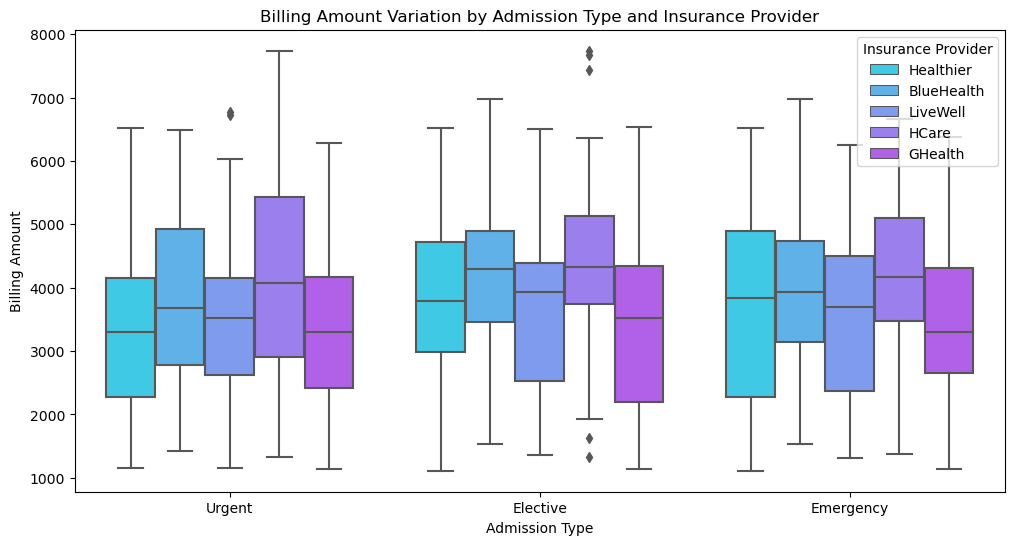

<Figure size 640x480 with 0 Axes>

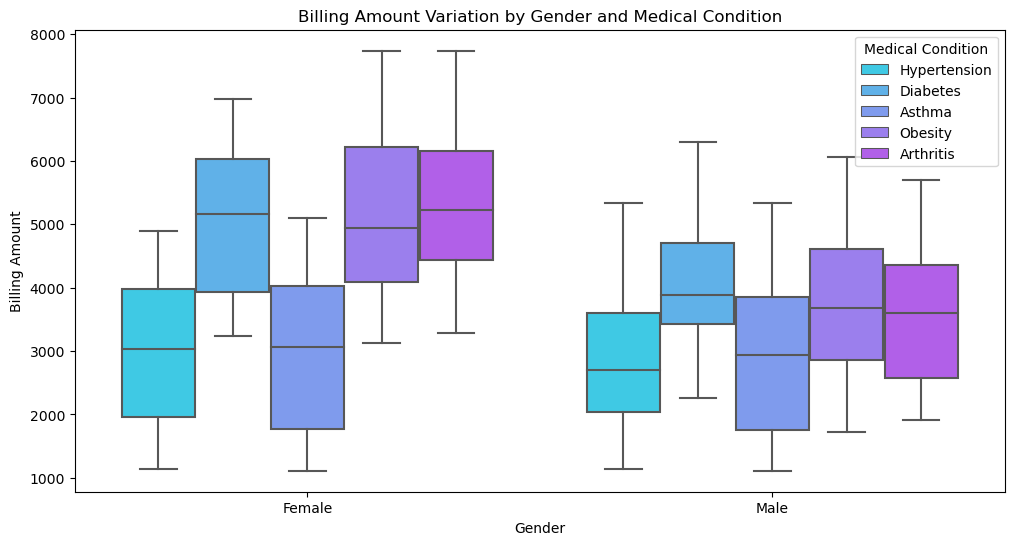

<Figure size 640x480 with 0 Axes>

In [14]:
# Boxplot of Billing Amount by Admission Type and Insurance Provider
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Admission Type', y='Amount Billing', hue='Insurance Provider')
plt.title('Billing Amount Variation by Admission Type and Insurance Provider')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.legend(title='Insurance Provider')
plt.show()
plt.tight_layout()

# Boxplot of Billing Amount by Gender and Medical Condition
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Amount Billing', hue='Medical Condition')
plt.title('Billing Amount Variation by Gender and Medical Condition')
plt.xlabel('Gender')
plt.ylabel('Billing Amount')
plt.legend(title='Medical Condition')
plt.show()
plt.tight_layout()

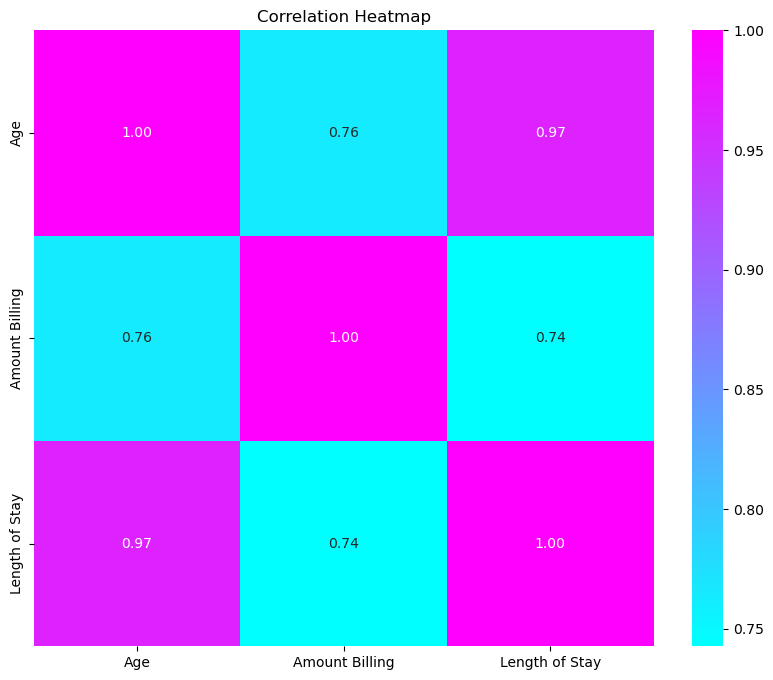

In [15]:
# Plot the correlation heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='cool', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()